# Predicting the Prices of Airbnb in New York

## 1. Defining the question

### a) Specifying the Data Analytic Question

The solution will seek to determine the prices of Airbnbs based on several factors. A model will be build to predict the price of an Airbnb correctly


### b) The Metric for Success

We aim to establish the price of an Airbnb based on factors such as location, the rooms, the reviews among others. We will do so by using the dataset with Neural Network with Tensor Flow that will corrrectly predict the price of apartments and make reccomendations to both owners and clients on pricing. We seek to realize a precision of 80%.

### c) The Experimental Design
 Below are the steps taken in this analysis
 1. loading the required libraries
 2. Loading and previewing data
 3. Cleaning the data
 4. Univariate analysis
 5. Bivariate analysis
 6. Implementing the solution by using Tensor Flow
 7. Challenging the solution and giving insights on how improvements can be made.


### d) Data Relevance and Validation 

The data available is relevant for the intended analysis. It contains information that is significant to predicting the prices of Airbnb based on the various features of rooms in New York in 2019.
The data will help us in answering the data analytic question on determining the price of an Airbnb based on the different features. 

### e) Understanding the context 

The data set we are to work with contains the following columns:
1. id:Airbnb's unique identifier for the listing
2. name:Name of the listing
3. host_id:Airbnb's unique identifier for the host/user
4. host_name:Name of the host. Usually just the first name(s).
5. neighbourhood_group:The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
6. neighbourhood:The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
7. latitude:Uses the World Geodetic System (WGS84) projection for latitude and longitude.
8. longitude:Uses the World Geodetic System (WGS84) projection for latitude and longitude.
9. room_type:"Entire home/apt,Private room,Shared room
10. price:daily price in local currency. Note, $ sign may be used despite locale
11. minimum_nights:minimum number of night stay for the listing (calendar rules may be different)
12. number_of_reviews:The number of reviews the listing has (in the last 30 days)
13. last_review:The date of the last/newest review
14. reviews_per_month:The number of reviews the listing has over the lifetime of the listing
15. calculated_host_listings_count:The number of listings the host has in the current scrape, in the city/region geography.
16. availability_365:avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may be available because it has been booked by a guest or blocked by the host.

The data used in this analytic can be accessed through this [link](docs.google.com/spreadsheets/d/1ZY1syF1NGZFoJjtVrpDFyad-xSR1T_y5rjG5OulPa_I/edit#gid=1648999504)
 
 Our  dataset did not have any data descriptions/metadata and this neccesitated researching and the attached metadata was accessed from this [link](docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)

## 2. Reading the Data

 ### a) Loading the Required Libraries

In [1]:
# Importing the libraries that will be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats


### b) Reading the Data

In [5]:
#Loading our dataset
data=('/content/AB_NYC_2019.csv')
airbnb=pd.read_csv(data)

# Exploring our  data set
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#Checking the tail end of our data
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
# Checking the shape of the data to establish the number of rows and columns
airbnb.shape

(48895, 16)

**Observation**

This observation indicates our data has 48895 rows and 16 columns

In [8]:
# Checking the summary information of the data, the datatypes of the various columns
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
#Checking for the uniques values in each column
airbnb.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

**Observation**
Here we can see the number of unique values in each column


## 3. Cleaning the Dataset

In [10]:
#Checking the column names to ascertain they are well writted and formatted
#The output shows tehre are typing errors and the formating is not consistently correct
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Observation**

Here we see that the column names are correctly and consistently written. There are no errors and the format is consistent.

In [11]:
# Ascertaining the number of unique neighbourhood groups contained in this data
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

**Observation**

Here we realize there are five neighbourhood groups Brooklyn, Manhattan, Queens, Staten Island, and Bronx.

In [12]:
#Checking on the data types
airbnb.dtypes 

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Observation**

Our columns are in their correct data types

In [13]:
# Establishing the existing null values
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
#Making a copy of our data set
airbnb_copy=airbnb.copy()
airbnb_copy.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Observation**
we realize that there are null values in name, host name, last review and reviews per month columns. The last review and reviews per month columns have the largest numbers of missing values, 10052 missing in both.

In [15]:
#Dropping the columns we do not need
airbnb_copy1=airbnb_copy.drop(['id', 'last_review'],axis=1)
airbnb_copy1.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [16]:
#Filling the NAn values in the reviews_per_month column with 0
airbnb_copy1.fillna({'reviews_per_month':0},inplace=True)

airbnb_copy1.isnull().sum()

name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

**Observation**
We can see that the reviews per month has no null values anymore

In [17]:
# Dropping null values
airbnb_copy1=airbnb_copy1.dropna()

airbnb_copy1.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Observation**
We see that all the null values have been eliminated 

In [18]:
# Checking for anomalies
airbnb_copy1.describe().style.background_gradient()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,67631688.285951,40.728941,-73.952170,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,78623888.992733,0.054528,0.046159,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2438.000000,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7818668.750000,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,30791331.000000,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,107434423.000000,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,274321313.000000,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [19]:
#Checking for the minimum nights column to understand the data
airbnb_copy1.minimum_nights.unique()


array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32,  110,  270,   22,   75,  250,   62,   23,
       1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,   99,
        160,   47,  999,  186,  366,   68,   93,   87,  183,  299,  175,
         98,  133,  354,   42,   33,   37,  225,  400,  105,  184,  153,
        134,  222,   58,  210,  275,  182,  114,   85,   36])

In [20]:
# Checking for ouliers in availability_365
outliers = []

def detect_outlier(airbnb_copy1):
  threshold=3
  mean_1=np.mean(airbnb_copy1)
  std_1=np.std(airbnb_copy1)

  for y in airbnb_copy1:
    z_score=(y-mean_1)/std_1
    if np.abs(z_score)>threshold:
      outliers.append(y)
  return outliers
detect_outlier(airbnb_copy1['availability_365'])

[]

In [21]:
# Checking for ouliers in calculated host listings count
detect_outlier(airbnb_copy1['calculated_host_listings_count'])

[121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 232,
 121,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 327,
 327,
 232,
 327,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232

In [22]:
# Checking for ouliers in reviews per month
detect_outlier(airbnb_copy1['reviews_per_month'])

[121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 232,
 121,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 327,
 327,
 232,
 327,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232

In [23]:
# Checking for ouliers in minimum nights
detect_outlier(airbnb_copy1['minimum_nights'])

[121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 232,
 121,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 327,
 327,
 232,
 327,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232

In [24]:
# Checking for ouliers in price
detect_outlier(airbnb_copy1['price'])

[121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 121,
 232,
 121,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 327,
 327,
 232,
 327,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232,
 232

**Observation**

We detected outliers in the 4 columns however we will not remove them as they are critical for our analysis

## 4. Exploratory Data Analysis

### a) Univariate Analysis

In [25]:
# Number of AirBnbs per Neighbourhood
airbnb_copy1['neighbourhood_group'].value_counts()

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


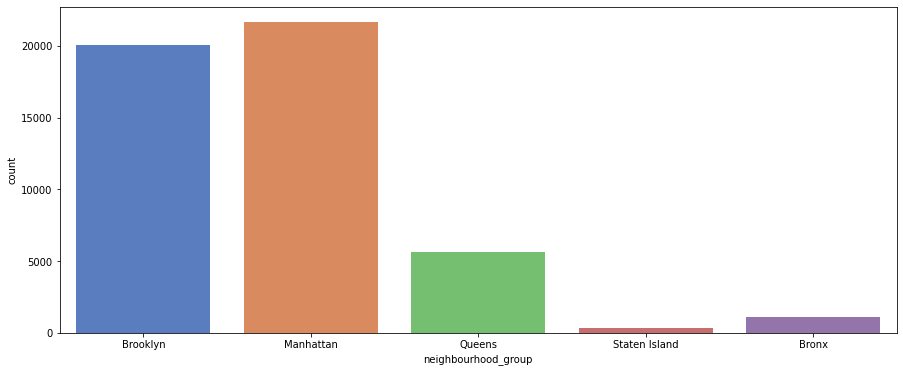

In [26]:
# Count of Airbnb in different locations

f, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(airbnb_copy1['neighbourhood_group'],palette="muted")
plt.show()

**Observation**

The plot shows that most AirBnb's are in Manhattan and the least in Staten Island

###Room Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


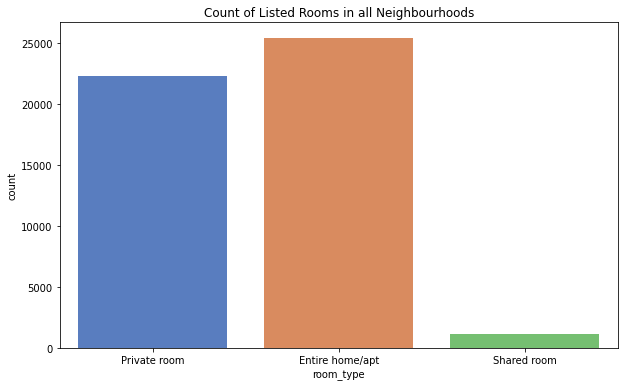

In [27]:
# Count of Room type
f, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(airbnb_copy1['room_type'],palette="muted")
plt.title('Count of Listed Rooms in all Neighbourhoods')
plt.show()

**Observation**

The graph indicates that the most listed room type is Entire home/apartment while the least being Shared room.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


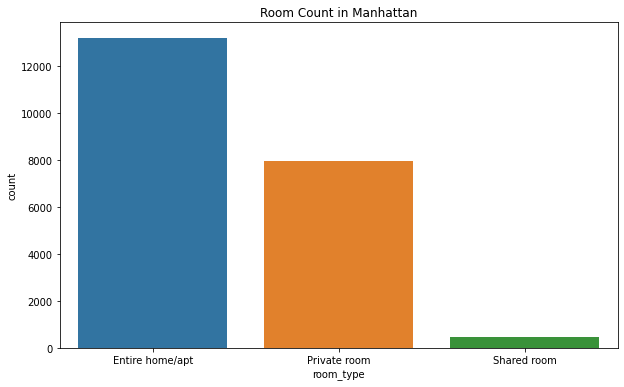

In [28]:
# Count of Room type in Manhattan only
f, ax = plt.subplots(figsize=(10,6))
ax = airbnb_copy1[airbnb_copy1.neighbourhood_group=='Manhattan']['room_type']
sns.countplot(ax)
plt.title('Room Count in Manhattan')
plt.show()

**Obervation**

In Manhattan the most listed room type is Entire home/apartment while the least being the Shared room.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


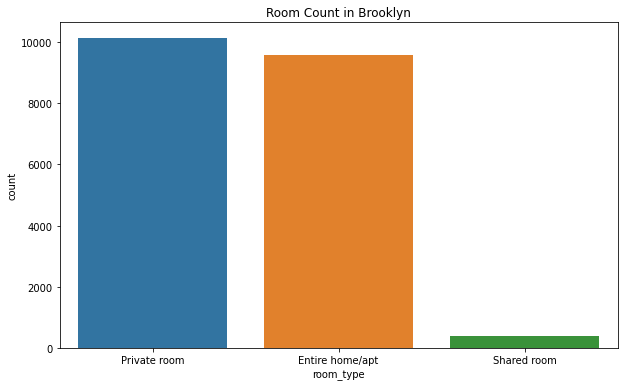

In [29]:
# Count of Room type in Brooklyn only
f, fx = plt.subplots(figsize=(10,6))
ax = airbnb_copy1[airbnb_copy1.neighbourhood_group=='Brooklyn']['room_type']
plt.title('Room Count in Brooklyn')
sns.countplot(ax)
plt.show()

**Obervation**

In Brooklyn, the most listed room type is the Private room while the least being the Shared room.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


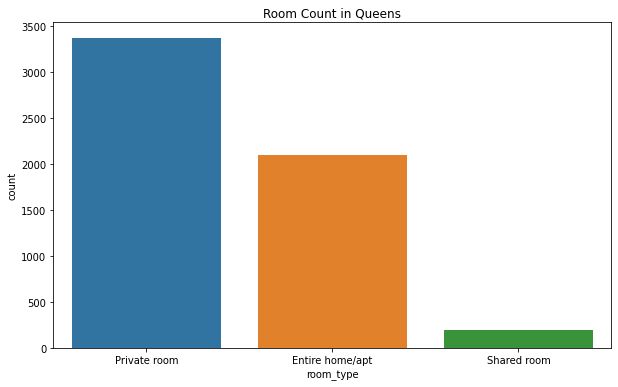

In [30]:
# Count of Room type in Queens only
f, fx = plt.subplots(figsize=(10,6))
ax = airbnb_copy1[airbnb_copy1.neighbourhood_group=='Queens']['room_type']
plt.title('Room Count in Queens')
sns.countplot(ax)
plt.show()

**Obervation**

In Queens, the most listed room type is the Private room while the least being the Shared room.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


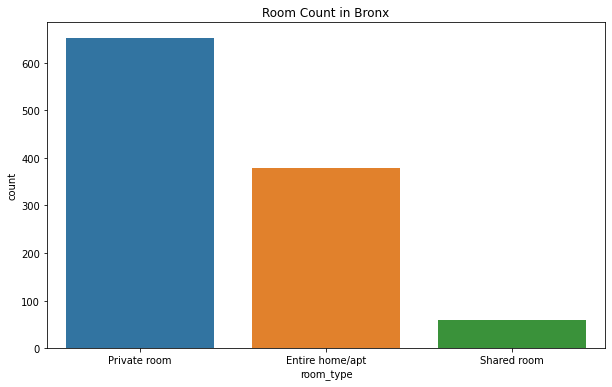

In [31]:
# Count of Room type in Bronx only
f, fx = plt.subplots(figsize=(10,6))
ax = airbnb_copy1[airbnb_copy1.neighbourhood_group=='Bronx']['room_type']
plt.title('Room Count in Bronx')
sns.countplot(ax)
plt.show()

**Obervation**

In Bronx, the most listed room type is the Private room while the least being the Shared room.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


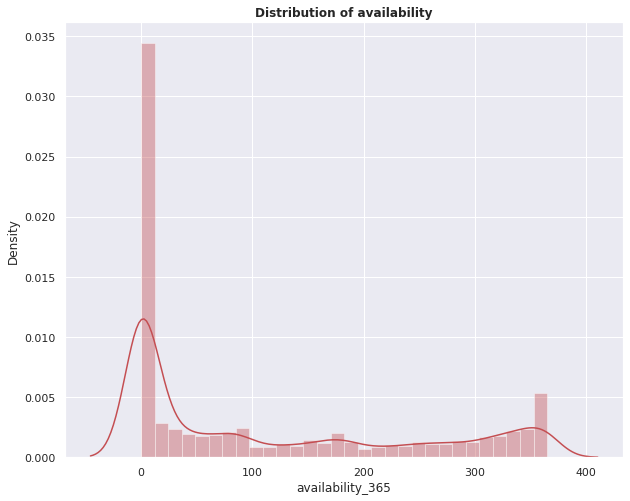

In [32]:
# Distribution Plot for Airbnb availability
sns.set(rc = {'figure.figsize':(10,8)})
sns.distplot(airbnb_copy1['availability_365'], color = 'r') 
plt.title('Distribution of availability', fontweight = 'bold');

plt.show()

**Observations**

The rooms are available throughout the year





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


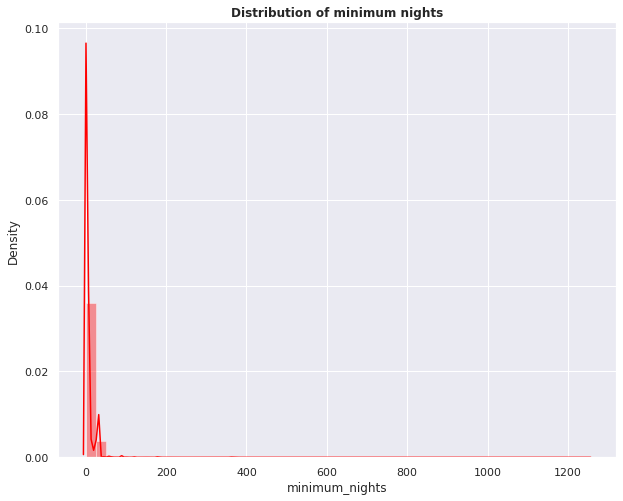

In [33]:
# Distribution Plot for Minimum Nights
sns.distplot(airbnb_copy1['minimum_nights'], color = 'red') 
plt.title('Distribution of minimum nights', fontweight = 'bold');
plt.show()
sns.set(rc = {'figure.figsize':(6,8)})

**Observation**

The graph shows tha data is skewed to the right with most values for the minimum nights clustered around 0. There are also values going all the way to over 1200 nights.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


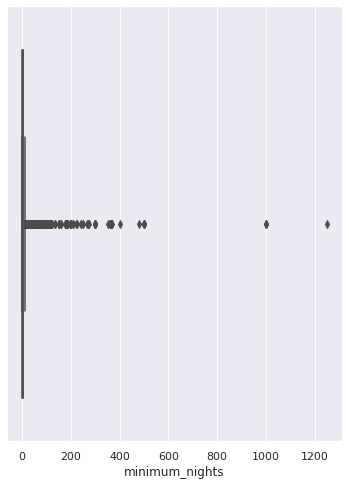

In [34]:
#boxplot for minimum nights
sns.boxplot(airbnb_copy1['minimum_nights'])
plt.show()

**Observation**

Most of the nights are between 0 and 300, there are however some values reaching over 1200

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


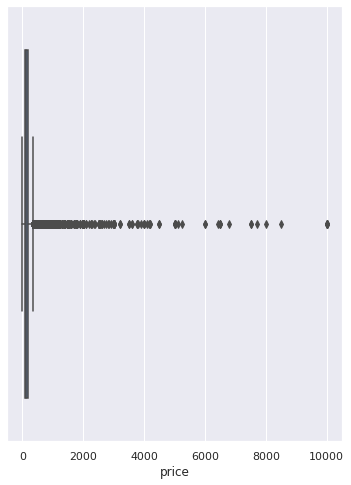

In [35]:
#boxplot for price
sns.boxplot(airbnb_copy1['price'])
plt.show()

**Observation**

Most of the values for price are below 4000, however there are also  values above that and extremes reaching 10,000

**Observation**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


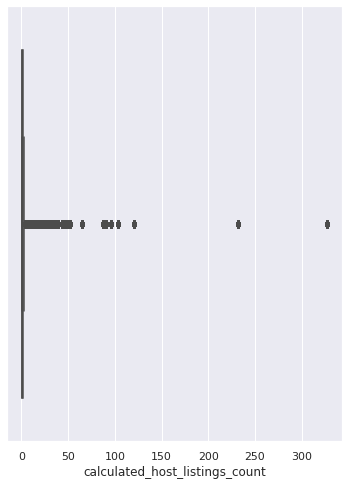

In [36]:
# box plot for calculated_host_listings_count

sns.boxplot(airbnb_copy1['calculated_host_listings_count'])
plt.show()

**Observation**
The host listsings indicate a lot of values being below 50. There are also values higher with extremes of over 350


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


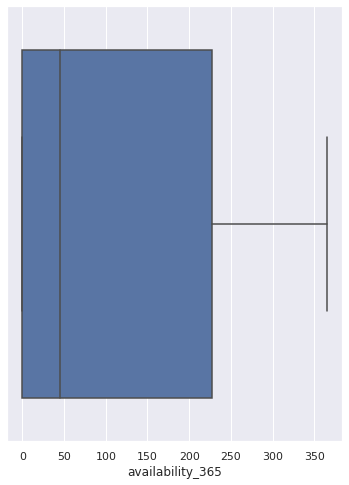

In [37]:
# box plot for availability_365
sns.boxplot(airbnb_copy1['availability_365'])
plt.show()

**Observation**
This indicates that the mean value of availability is around 49, the extreme values reach over 350

### b) Bivariate Analysis

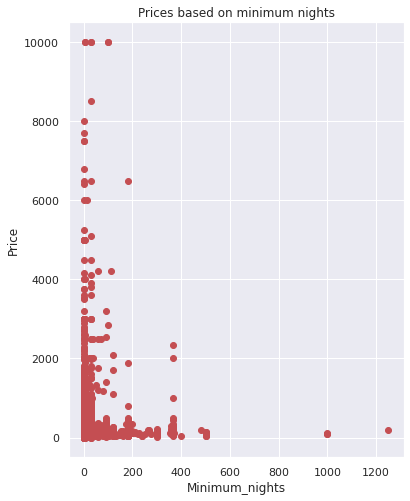

In [38]:
# A scatter plot of the price based on the minimum nigts
plt.scatter(airbnb_copy1["minimum_nights"], airbnb_copy1["price"], color='r')
plt.title('Prices based on minimum nights')
plt.xlabel('Minimum_nights')
plt.ylabel('Price')

plt.show()

**Observation**

The graph shows that booking a higher number of nights attracts a lower price rate compared to lower number of nights.

In [39]:
#reviews per room type
reviews_room_type = airbnb_copy1.groupby('room_type')['number_of_reviews'].agg('count')
reviews_room_type

room_type
Entire home/apt    25393
Private room       22306
Shared room         1159
Name: number_of_reviews, dtype: int64

**Observation**

Entire home appt recieved the highest number of reviews at 25393 followed by private rooms at 22306 and shared rooms at 1159

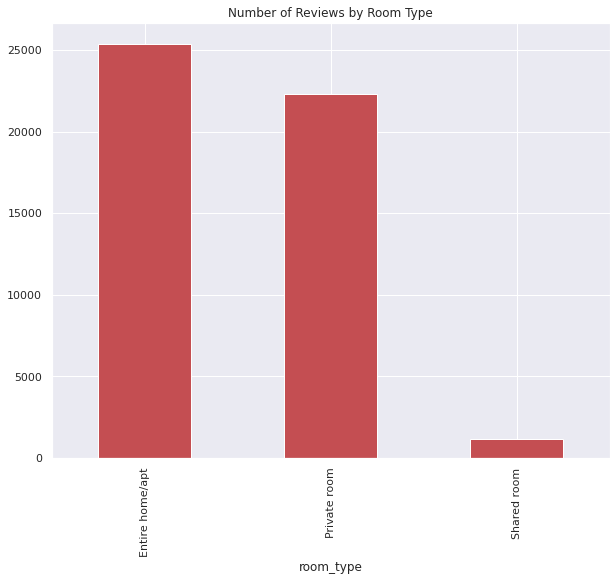

In [40]:
#Visualizing the Number of reviews by the room type
reviews_room_type .plot(kind = 'bar', title = 'Number of Reviews by Room Type',figsize=(10,8), color = 'r')
plt.show()

**Observation**

Entire home appt got the highest number of reviews followed by private rooms with shared rooms getting the least

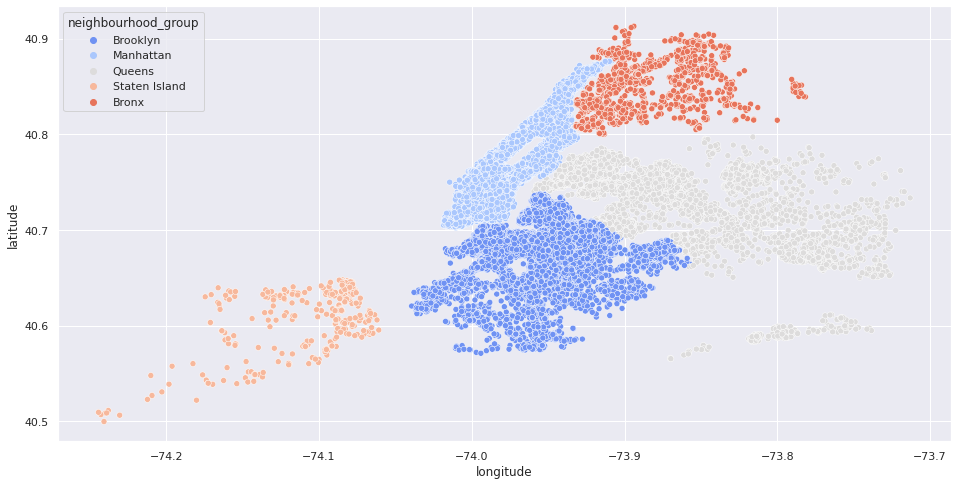

In [41]:
#Longitude vs latitude to show different neighbourhood groups

f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=airbnb_copy1.latitude,x=airbnb_copy1.longitude,hue=airbnb_copy1.neighbourhood_group,palette="coolwarm")
plt.show()

**Observation**

This plot shows the location of the different neighbourhood groups where the rooms are located, that is; Brooklyn, Manhattan, Queens,Staten Island and Bronx.

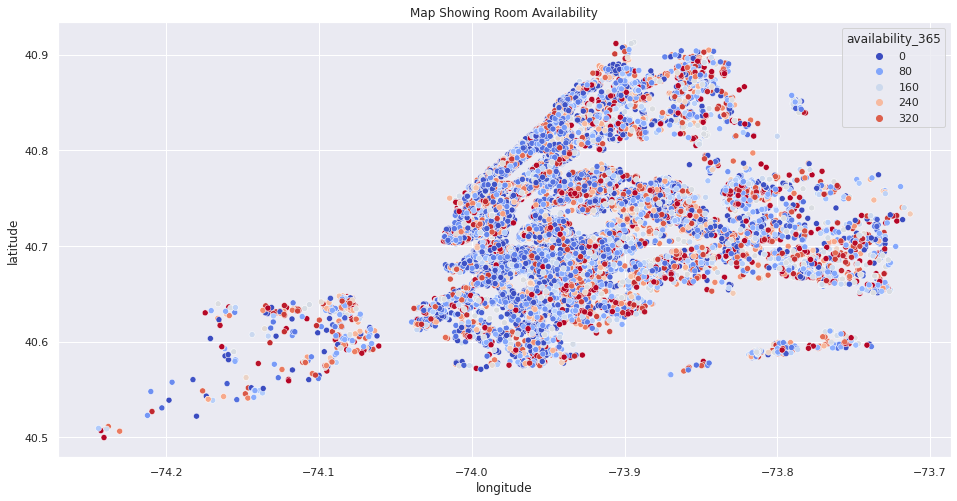

In [42]:
#longitude vs latitude to visualize the available rooms
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=airbnb_copy1.latitude,x=airbnb_copy1.longitude,hue=airbnb_copy1.availability_365,palette="coolwarm")
plt.title('Map Showing Room Availability')
plt.show()

**Observation** This plot shows the rooms availability in different locations.

In [43]:
import plotly.express as px
lat = np.mean(airbnb_copy1['latitude'])
lon = np.mean(airbnb_copy1['longitude'])

fig = px.density_mapbox(airbnb_copy1, lat='latitude', lon='longitude', z='price', radius=2,
                        center=dict(lat = lat, lon = lon), zoom=10,
                        mapbox_style="carto-positron")
fig.show()

**Observation**

This is an interactive map that shows the prices of available rooms in the locations given by the coordinates

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



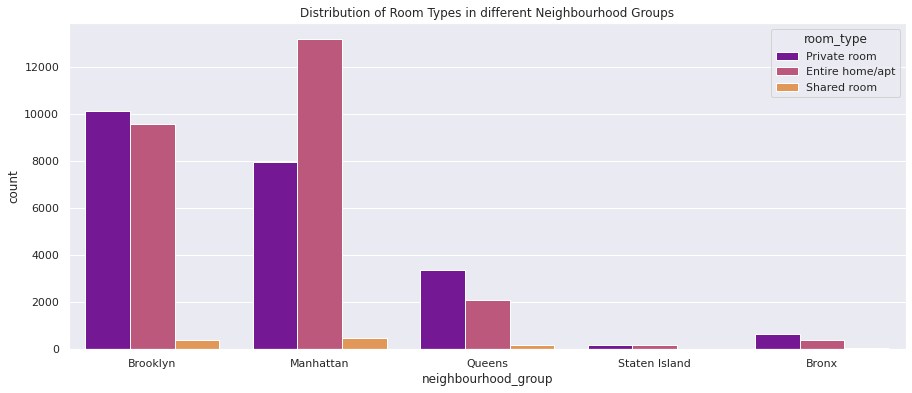

In [44]:
#room type with neighbourhood group
sns.countplot(airbnb_copy1['neighbourhood_group'],hue=airbnb_copy1['room_type'] , palette="plasma")
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.title('Distribution of Room Types in different Neighbourhood Groups')

plt.show()

**Observation**

This visualization indicates that in Brooklyn, Queens and Bronx, private rooms were more prevalent followed by Entire room/apt. In Manhattan the entire room/apt were more than private rooms.

In [45]:
#Correlation co-efficient to determine the relationship betweeen number of reviews and the price
# We calculate the Pearson co-efficint

airbnb_copy1["number_of_reviews"].corr(airbnb_copy1["price"])

-0.04794862048370003

**Observation**

The above output indicates a weak negative correlation

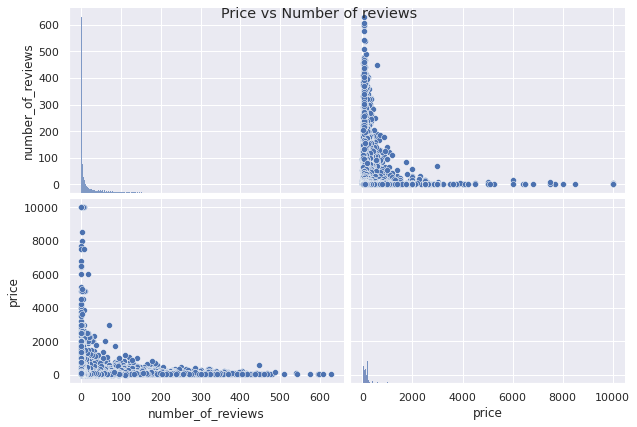

In [46]:
#Checking the relationship between the number of reviews and the price
pp = sns.pairplot(airbnb_copy1[['number_of_reviews','price']], height= 3, aspect= 1.5)
pp.fig.suptitle("Price vs Number of reviews");

**Observation**

There is no relationship between the number of reviews and the price of an air BnB

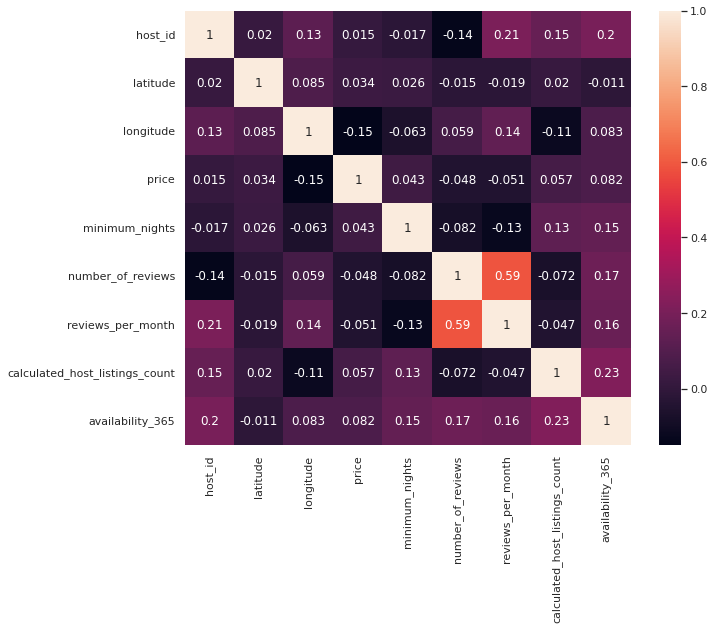

In [47]:
# Summary of correllation coefficient
corrmat = airbnb_copy1.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat,annot=True)
plt.show()


**Observation**

There is a moderate relationship between number of reviews and the reviews per month.Number_of_reviews and reviews_per_month show  almost the same information, hence we can make an analysis with either of the two variables.

 All the other features have a weak correlation.



In [48]:
from _plotly_utils.colors.colorbrewer import Pastel1
#Comparing the room types to the differrent neighbourhood groups in New York
pd.crosstab([airbnb_copy1.room_type],airbnb_copy1.neighbourhood_group, margins=True).style.background_gradient(cmap='Pastel1_r')

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island,All
room_type,,,,,,
Entire home/apt,378,9553,13190,2096,176,25393
Private room,652,10123,7973,3370,188,22306
Shared room,59,413,480,198,9,1159
All,1089,20089,21643,5664,373,48858


We see that Bronx and Queens have more Private room types compared to the others. Manhattan has more of the Entire home/apt rooms compared to the other. Overall the prevalent room types in New York are the Entire home/apt at 25393 with private rooms being 22306 and shared rooms being 1159.

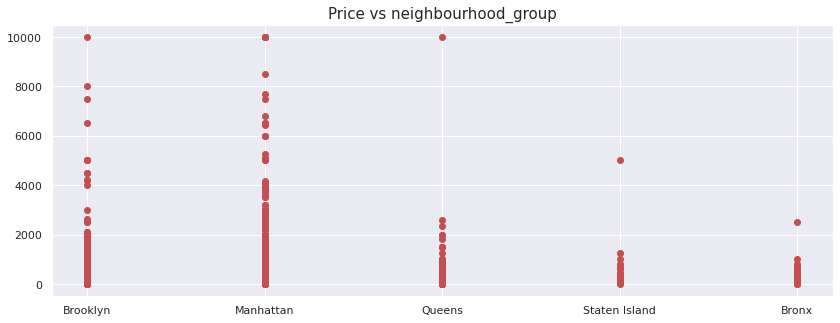

In [49]:
#plot charts comparing prices to Neighbourhood groups
fig = plt.figure(figsize = (14,5))
plt.title("Price vs neighbourhood_group", fontsize = 15)
plt.scatter(airbnb_copy1['neighbourhood_group'],airbnb_copy1['price'],color='r')
plt.show()

**Observation**

Manhattan followed by Brooklyn had the highest prices while Bronx and Staten Island  had the lowest prices

In [50]:
# Price (Average)rates of different neighbourhood

print(airbnb_copy1.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=False))

neighbourhood_group
Manhattan        196.897473
Brooklyn         124.410523
Staten Island    114.812332
Queens            99.536017
Bronx             87.469238
Name: price, dtype: float64


**Observation**
Here we see that Manhattan has the highest prices on average at 196.9 followed by Brooklyn at  124.41. Bronx has the lowest average rates at 87.47

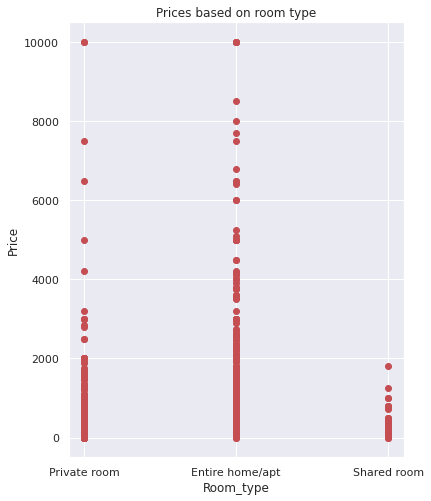

In [51]:
#plot charts comparing prices to room type
plt.scatter(airbnb_copy1["room_type"], airbnb_copy1["price"], color='r')
plt.title('Prices based on room type')
plt.xlabel('Room_type')
plt.ylabel('Price')

plt.show()

**Observation**
Entire home/apartment has the highest prices followed by private rooms and the lowest being the shared room.

In [52]:
# Price (Average)rates of different room types
print(airbnb_copy1.groupby("room_type")["price"].mean().sort_values(ascending=False))

room_type
Entire home/apt    211.806994
Private room        89.794360
Shared room         70.075928
Name: price, dtype: float64


**Observation** 
Entire home apartment has the highest price on average at
211.80 followed by private room at 89.78 with shared room having the lowest avarage price of 70.07

---



In [53]:
#Correlation co-efficient to determine the relationship betweeen house hold sizes and the age of the respodent
# We calculate the Pearson co-efficint

airbnb_copy1["minimum_nights"].corr(airbnb_copy1["price"])

0.04280389867226591

**Observation**
The above output indicates a medium positive correlation

<function matplotlib.pyplot.show(*args, **kw)>

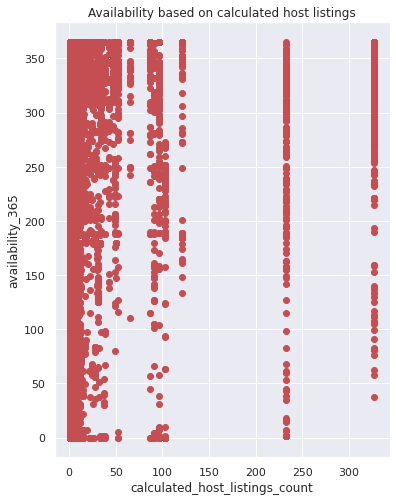

In [54]:
# Availability vs calculated host listings
plt.scatter(airbnb_copy1["calculated_host_listings_count"], airbnb_copy1["availability_365"], color='r')
plt.title('Availability based on calculated host listings')
plt.xlabel('calculated_host_listings_count')
plt.ylabel('availability_365')
plt.show

### Modeling and Predicting using Tensor Flow

In [55]:
#Importing the libraries for using with our model
!pip install tensorflow-hub

import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras import regularizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
#Encoding columns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

airbnb_nyc = airbnb_copy1.drop(['name', 'host_name' ],axis =1)
airbnb_nyc.head(2)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


In [57]:
def encode(df):
    categorical_features = list(df.columns[df.dtypes == 'object'])
    for i in  categorical_features:
        df[i] = LabelEncoder().fit_transform(df[i])
    return df

In [58]:
# Previewing the data
airbnb_nyc1=encode(airbnb_nyc)
airbnb_nyc1.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2845,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,4632,2,94,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,4869,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,7192,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0


In [59]:
# Separating our data into train and test.
X = airbnb_nyc1.drop('price', axis = 1)
y = airbnb_nyc1['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [60]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  #Fit X_train only 

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##Tensor Flow

In [61]:
# Buiding the model and creating a function of the model
def build_model():
    model = keras.Sequential([
        layers.Dense(60, activation=tf.nn.relu, input_shape= X_train.shape[1:]),     # Setting our dense at 60
        layers.Dropout(0.5),
        layers.Dense(60, activation=tf.nn.relu,kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)),
        layers.Dropout(0.5),
        layers.Dense(60, activation=tf.nn.relu,kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)),
        layers.Dense(1)
          ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [62]:
# Building the model
model = build_model()

In [63]:
# Checking the summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                720       
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 8,101
Trainable params: 8,101
Non-trainabl

In [64]:
# Setting the number of EPOCHS 
EPOCHS = 25

In [65]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

model.fit(X_train, y_train, epochs=EPOCHS,batch_size=10,
                    validation_split = 0.2, verbose=1, callbacks=[early_stop])

Epoch 1/25
3127/3127 [==============================] - 11s 3ms/step - loss: 58128.8203 - mean_absolute_error: 75.4828 - mean_squared_error: 58122.8867 - val_loss: 46738.7383 - val_mean_absolute_error: 62.6304 - val_mean_squared_error: 46734.0820
Epoch 2/25
3127/3127 [==============================] - 16s 5ms/step - loss: 56761.8711 - mean_absolute_error: 69.8916 - mean_squared_error: 56757.6094 - val_loss: 46776.6875 - val_mean_absolute_error: 61.1501 - val_mean_squared_error: 46773.2930
Epoch 3/25
3127/3127 [==============================] - 21s 7ms/step - loss: 56650.4297 - mean_absolute_error: 68.9586 - mean_squared_error: 56647.0742 - val_loss: 47445.4180 - val_mean_absolute_error: 62.4074 - val_mean_squared_error: 47442.6836
Epoch 4/25
3127/3127 [==============================] - 13s 4ms/step - loss: 56325.4297 - mean_absolute_error: 67.7592 - mean_squared_error: 56322.8633 - val_loss: 46038.4414 - val_mean_absolute_error: 63.0828 - val_mean_squared_error: 46036.0273
Epoch 5/25
3

In [66]:
# Testing the accuracy of our model
test_results = {}

test_results['model'] = model.evaluate(
    X_test, y_test, verbose=1)

print(f" Accuracy: {test_results}")

306/306 [==============================] - 1s 2ms/step - loss: 44594.7969 - mean_absolute_error: 63.5251 - mean_squared_error: 44583.7109
 Accuracy: {'model': [44594.796875, 63.5251350402832, 44583.7109375]}


In [67]:
# Testing the accuracy of our model
test_results = {}

test_results['model'] = model.evaluate(
    X_train, y_train, verbose=1)

print(f" Accuracy: {test_results}")

1222/1222 [==============================] - 2s 2ms/step - loss: 53257.9414 - mean_absolute_error: 65.6677 - mean_squared_error: 53246.7852
 Accuracy: {'model': [53257.94140625, 65.66768646240234, 53246.78515625]}


## 5. Challenging the solution



### Gradient Boosting Regression

In [68]:
# Creating X and y sets
x = airbnb_nyc1.drop('price', axis=1)
y = airbnb_nyc1['price']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

In [69]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, min_samples_split = 2, learning_rate = 0.1)
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

# Finding the mean_squared error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

# Finding the mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_squared_error(y_test, y_pred)

# Finding the r2 score or the variance (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)


In [70]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x_test, y = y_test, cv = 10)

# Printing metrics
print("RMSE Error:", round(np.sqrt(mse), 2))
print("MAE Score:", round(mae, 4))
print("R2 Score:", round(r2, 4))
print("Mean accuracy:", round(accuracies.mean(), 2))
print("Std deviation:", round(accuracies.std(), 4))

RMSE Error: 202.47
MAE Score: 40995.0954
R2 Score: 0.1877
Mean accuracy: -0.28
Std deviation: 0.8818


## 5. Conclusion and Recommendations
**Conclusion**
1.	Manhattan and Brooklyn have the highest number of Airbnbs Staten Island and Bronx have the lowest number
2.	The higher the number of nights booked the better(lower) the price to pay
3.	Manhattan has the highest prices on average at 196.9 followed by Brooklyn, Staten Island and Queens.  Bronx has the lowest average rates at 87.47
4.	Most listed room type is Entire home/apartment while the least being Shared room.
5.	Prices ranges are high, from less than 100 to as high as 10,000
6.	Entire home/appt received the highest number of reviews followed by private rooms and shared rooms 
7.	In Brooklyn, Queens and Bronx, private rooms were more prevalent followed by Entire room/apt. In Manhattan the entire room/apt were more than private rooms.
8.	Analysis of the various neighbourhoods group found different prevalence traits for each neighbourhood group, which has an effect on the price

**Recommendations**



1.  To get a better price rate, one needs to book for more nights
2. When looking for the lowest prices, start with Bronx followed by Staten Island. You’ll find high prices in Manhattan followed by Brooklyn and Queens
3. When looking for private rooms it better to go to Brooklyn, Queens and Bronx. Entire room/apt come second in prevalence in these neighbourhoods. In Manhattan you’ll easily find Entire room/apt compared to private rooms.
4. Entire homes rooms are averagely more pricey than the private and shared room types 
5. There is need to check on the demand of shared rooms as they are very few


